In [22]:
import numpy as np
import pandas as pd
import wrds
import datetime as dt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("/Users/dhruvishah/Desktop/Quant_Fin/SEM 2/Dissertation/Dhruvi_Healthcare_Ret.csv") 
df

,Date,Day,A,ABBV,ABC,ABT,ACAD,ACHC,ACOR,ACRS,...,WAT,WBA,WLP,WST,XBIT,XRAY,ZBH,ZMH,ZONA,ZTS
0,03/01/05,Monday,-0.009129,NaN,-0.009032,0.000429,-0.056130,NaN,NaN,NaN,...,-0.021800,NaN,-0.021739,0.010787,NaN,-0.009964,NaN,-0.009236,-0.060046,NaN
1,04/01/05,Tuesday,-0.026382,NaN,-0.007911,-0.010071,-0.017214,NaN,NaN,NaN,...,-0.016823,NaN,-0.013333,0.007905,NaN,-0.008088,NaN,-0.000378,0.002457,NaN
2,05/01/05,Wednesday,-0.000430,NaN,-0.001907,-0.011472,-0.003185,NaN,NaN,NaN,...,0.007333,NaN,0.038018,0.000000,NaN,-0.011777,NaN,-0.007813,0.041667,NaN
3,06/01/05,Thursday,-0.021945,NaN,0.008510,0.022553,0.012780,NaN,NaN,NaN,...,0.008162,NaN,0.001562,-0.001176,NaN,0.004767,NaN,0.011558,-0.016471,NaN
4,07/01/05,Friday,-0.000880,NaN,-0.002927,0.017131,0.025237,NaN,NaN,NaN,...,-0.000657,NaN,0.003466,-0.002748,NaN,-0.007664,NaN,-0.001758,-0.043062,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,24/12/15,Thursday,0.008858,-0.002049,0.000096,0.000000,0.004297,-0.011556,0.000000,0.010457,...,0.000149,0.004765,NaN,0.011490,0.005682,-0.002130,0.001362,NaN,NaN,0.003126
2765,28/12/15,Monday,-0.008543,0.004961,0.002309,-0.001552,0.001141,-0.001602,-0.005122,-0.007244,...,0.000448,-0.007171,NaN,0.007465,0.012241,0.004925,-0.006413,NaN,NaN,-0.004779
2766,29/12/15,Tuesday,0.013882,0.011915,0.005567,0.017544,0.027066,0.016522,0.012169,-0.162960,...,0.016194,0.011417,NaN,0.001611,0.004651,0.011436,0.007237,NaN,NaN,0.008977
2767,30/12/15,Wednesday,-0.004485,0.005887,0.002386,-0.012003,-0.004993,-0.009153,-0.005087,0.062266,...,-0.003892,-0.004953,NaN,-0.003216,0.002778,-0.008076,-0.002919,NaN,NaN,-0.001448


In [24]:
cols = []
for i in df.columns:
    count = df[i].count()
    if count == len(df):
        cols.append(i)
cleandf = df[cols]

# Convert the 'date' column to a pandas datetime object
cleandf['Date'] = pd.to_datetime(cleandf['Date'], format='%d/%m/%y')

# Set the 'date' column as the DataFrame index
cleandf.set_index('Date', inplace=True)
cleandf

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_35123/231457197.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf['Date'] = pd.to_datetime(cleandf['Date'], format='%d/%m/%y')


,Day,A,ABC,ABT,ACAD,ADSK,AHS,ALGN,ALNY,AMED,...,TMO,UHS,UNH,USPH,UTHR,UTMD,VRX,WAT,WST,XRAY
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,Monday,-0.009129,-0.009032,0.000429,-0.056130,-0.013702,-0.010685,-0.017674,0.014726,-0.027478,...,-0.016893,-0.011236,-0.016017,0.013619,-0.024363,-0.011571,-0.025047,-0.021800,0.010787,-0.009964
2005-01-04,Tuesday,-0.026382,-0.007911,-0.010071,-0.017214,-0.064921,-0.010165,-0.014205,-0.003958,-0.023810,...,-0.012466,-0.006364,-0.010275,-0.007678,-0.037457,-0.009005,-0.009342,-0.016823,0.007905,-0.008088
2005-01-05,Wednesday,-0.000430,-0.001907,-0.011472,-0.003185,0.007714,-0.028241,-0.000961,0.066225,-0.022764,...,-0.002729,0.006404,0.003499,0.013540,0.007783,-0.004543,-0.007859,0.007333,0.000000,-0.011777
2005-01-06,Thursday,-0.021945,0.008510,0.022553,0.012780,-0.004820,0.000000,-0.015385,0.080745,-0.004659,...,0.000684,0.000000,0.022085,-0.003817,0.015212,0.005477,0.006337,0.008162,-0.001176,0.004767
2005-01-07,Friday,-0.000880,-0.002927,0.017131,0.025237,-0.022792,-0.006605,0.003906,0.034483,0.008024,...,-0.014701,0.000000,-0.007961,-0.005109,-0.018903,-0.018157,-0.007477,-0.000657,-0.002748,-0.007664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,Thursday,0.008858,0.000096,0.000000,0.004297,-0.003063,0.002938,0.004146,-0.007226,-0.009634,...,0.002127,-0.003799,-0.002949,0.054956,0.006317,0.008532,-0.007221,0.000149,0.011490,-0.002130
2015-12-28,Monday,-0.008543,0.002309,-0.001552,0.001141,0.000162,-0.014648,0.014528,0.011028,-0.019698,...,-0.004387,-0.010693,-0.000084,-0.000183,-0.000311,-0.019289,-0.104899,0.000448,0.007465,0.004925
2015-12-29,Tuesday,0.013882,0.005567,0.017544,0.027066,0.005820,0.035018,0.000452,0.025087,0.032002,...,0.016560,0.017176,0.012592,0.011152,-0.010133,0.026398,-0.007343,0.016194,0.001611,0.011436


In [25]:
end = []
weekly_last_days = cleandf.resample('W-FRI').last()

weekly_last_days = weekly_last_days.dropna()

end = weekly_last_days.index.strftime('%d/%m/%y').tolist()

end_list = end[2:]
# end[2:]

start = []
weekly_first_days = cleandf.resample('W-MON').first()

weekly_first_days = weekly_first_days.dropna()

start = weekly_first_days.index.strftime('%d/%m/%y').tolist()
start_list = start

In [26]:
weekly_df = pd.DataFrame(columns=[['week'] +['FROM'] +['TO']+ cols[2:]])
start_list = pd.to_datetime(start_list, format='%d/%m/%y')
end_list = pd.to_datetime(end_list, format='%d/%m/%y')
start_list = start_list.sort_values()
end_list = end_list.sort_values()

In [27]:
for i in cols[2:]:
    temp = cleandf[['Day', i]]
    weekly = []
    for j in range(len(end_list)):
        start_date = start_list[j]
        end_date = end_list[j]
        selected_data = temp[(temp.index >= start_date) & (temp.index <= end_date)]
        log_ret = selected_data[i].sum()
        weekly_returns = (np.exp(log_ret) - 1) * 100
        weekly.append(weekly_returns)
    weekly_df[i] = weekly

weekly_df['FROM'] = start_list[:-3]
weekly_df['TO'] = end_list
weekly_df

,week,FROM,TO,A,ABC,ABT,ACAD,ADSK,AHS,ALGN,...,TMO,UHS,UNH,USPH,UTHR,UTMD,VRX,WAT,WST,XRAY
0,NaN,2005-01-03,2005-01-21,-9.391395,-2.792372,-0.793733,-0.985908,-17.088715,-13.433303,-4.565974,...,-0.646700,-1.316359,1.046235,-0.365730,-3.266363,-6.092600,-1.846440,2.060950,4.026137,-1.539329
1,NaN,2005-01-10,2005-01-28,-4.699107,0.921520,-4.117433,8.067733,-15.666415,-6.769289,-13.885812,...,2.655137,-3.439458,1.130442,-8.662980,0.048012,-4.522732,-1.610786,6.031390,2.128333,4.792812
2,NaN,2005-01-17,2005-02-04,2.012891,4.195525,-1.559709,4.356841,0.287111,-2.971555,-21.167355,...,-4.514139,0.838193,2.569558,-2.818809,7.981421,0.662887,-0.810498,4.039245,4.049129,4.447357
3,NaN,2005-01-24,2005-02-11,9.139424,5.974467,0.533116,24.023143,-4.317331,-0.211276,-23.359766,...,-6.346183,2.285322,-1.122848,-10.863920,0.561772,-1.937289,-6.711281,5.255022,1.680769,3.290064
4,NaN,2005-01-31,2005-02-18,9.398610,2.966139,2.554071,10.461516,1.665721,-5.938560,-12.536533,...,-6.437732,5.127846,1.155930,-1.474225,5.775316,6.102561,-2.882150,0.603816,2.856333,-0.304635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,NaN,2015-11-16,2015-12-04,12.043948,3.467565,3.186619,3.667036,8.180939,3.207568,3.096370,...,3.755398,0.178659,6.535598,1.366654,8.414971,-0.350385,29.322099,1.916636,1.429116,6.304242
568,NaN,2015-11-23,2015-12-11,2.483948,3.032883,-3.470739,-9.025506,1.099197,0.763198,-3.012686,...,-2.394076,-2.102091,3.263625,-8.607521,1.653928,-1.704604,3.164333,-2.656575,-0.912214,-2.315765
569,NaN,2015-11-30,2015-12-18,-4.307092,2.951828,-3.581877,-13.200559,-5.431997,-0.384459,-5.029133,...,-3.572041,-7.409904,1.932740,-4.083964,1.054723,3.538672,27.824239,-3.266557,-5.309547,-2.335397
570,NaN,2015-12-07,2015-12-25,2.663350,4.091278,-0.288184,-2.317621,-5.102232,1.549076,-0.171752,...,3.367354,1.275162,0.604319,9.818850,1.685548,3.279529,22.208816,2.330031,-1.771717,-3.259495


In [28]:
counter = 0
for i in range(0,len(weekly_df)):
    counter +=1
    weekly_df.loc[i, 'week'] = counter
weekly_df

,week,FROM,TO,A,ABC,ABT,ACAD,ADSK,AHS,ALGN,...,TMO,UHS,UNH,USPH,UTHR,UTMD,VRX,WAT,WST,XRAY
0,1,2005-01-03,2005-01-21,-9.391395,-2.792372,-0.793733,-0.985908,-17.088715,-13.433303,-4.565974,...,-0.646700,-1.316359,1.046235,-0.365730,-3.266363,-6.092600,-1.846440,2.060950,4.026137,-1.539329
1,2,2005-01-10,2005-01-28,-4.699107,0.921520,-4.117433,8.067733,-15.666415,-6.769289,-13.885812,...,2.655137,-3.439458,1.130442,-8.662980,0.048012,-4.522732,-1.610786,6.031390,2.128333,4.792812
2,3,2005-01-17,2005-02-04,2.012891,4.195525,-1.559709,4.356841,0.287111,-2.971555,-21.167355,...,-4.514139,0.838193,2.569558,-2.818809,7.981421,0.662887,-0.810498,4.039245,4.049129,4.447357
3,4,2005-01-24,2005-02-11,9.139424,5.974467,0.533116,24.023143,-4.317331,-0.211276,-23.359766,...,-6.346183,2.285322,-1.122848,-10.863920,0.561772,-1.937289,-6.711281,5.255022,1.680769,3.290064
4,5,2005-01-31,2005-02-18,9.398610,2.966139,2.554071,10.461516,1.665721,-5.938560,-12.536533,...,-6.437732,5.127846,1.155930,-1.474225,5.775316,6.102561,-2.882150,0.603816,2.856333,-0.304635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,568,2015-11-16,2015-12-04,12.043948,3.467565,3.186619,3.667036,8.180939,3.207568,3.096370,...,3.755398,0.178659,6.535598,1.366654,8.414971,-0.350385,29.322099,1.916636,1.429116,6.304242
568,569,2015-11-23,2015-12-11,2.483948,3.032883,-3.470739,-9.025506,1.099197,0.763198,-3.012686,...,-2.394076,-2.102091,3.263625,-8.607521,1.653928,-1.704604,3.164333,-2.656575,-0.912214,-2.315765
569,570,2015-11-30,2015-12-18,-4.307092,2.951828,-3.581877,-13.200559,-5.431997,-0.384459,-5.029133,...,-3.572041,-7.409904,1.932740,-4.083964,1.054723,3.538672,27.824239,-3.266557,-5.309547,-2.335397
570,571,2015-12-07,2015-12-25,2.663350,4.091278,-0.288184,-2.317621,-5.102232,1.549076,-0.171752,...,3.367354,1.275162,0.604319,9.818850,1.685548,3.279529,22.208816,2.330031,-1.771717,-3.259495


In [29]:
mktcap = pd.read_csv("/Users/dhruvishah/Desktop/Quant_Fin/SEM 2/Dissertation/Healthcare_MktCap_only.csv") 

tickers = mktcap['Ticker Name'].tolist()
tickers = ['week','FROM', 'TO'] + tickers
final_df = pd.DataFrame()
for i in tickers:
    try:
        final_df[i] = weekly_df[i]
    except:
        continue
final_ticks = final_df.columns[:23].tolist()
final_df = final_df[final_ticks]
final_df

text_data = pd.read_csv("/Users/dhruvishah/Desktop/Quant_Fin/SEM 2/Dissertation/Dh_text_InSamp.csv")

text_data.dropna(inplace=True)
text_data.reset_index(drop=True, inplace=True)
text_data

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_35123/2479653759.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df[i] = weekly_df[i]
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_35123/2479653759.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df[i] = weekly_df[i]
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_35123/2479653759.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan

,keydevid,companyid,companyname,keydeveventtypeid,announcedate,headline,situation
0,809686,275442,GLAXOSMITHKLINE PLC,23.0,03/01/05,Adolor Corp. and Glaxosmithkline to Co-Promote...,Adolor Corp. announced that the company has si...
1,810155,275442,GLAXOSMITHKLINE PLC,41.0,03/01/05,Glaxosmithkline plc Announces FDA Approved App...,GlaxoSmithKline plc announced that the U.S. Fo...
2,810324,103678,BECTON DICKINSON & CO,232.0,02/01/05,Becton Dickinson & Co. Declares Quarterly Divi...,The board of directors of Becton Dickinson & C...
3,810324,103678,BECTON DICKINSON & CO,46.0,02/01/05,Becton Dickinson & Co. Declares Quarterly Divi...,The board of directors of Becton Dickinson & C...
4,810589,25798,BRISTOL MYERS SQUIBB CO,16.0,03/01/05,Bristol-Myers Squibb Co. Names James M. Cornel...,Bristol-Myers Squibb Co. announced that its Bo...
...,...,...,...,...,...,...,...
31462,321129180,139677,JOHNSON & JOHNSON,149.0,31/12/15,"Biotechnology Industry Organization, BioCentur...","Biotechnology Industry Organization, BioCentur..."
31463,321129180,162270,PFIZER INC,149.0,31/12/15,"Biotechnology Industry Organization, BioCentur...","Biotechnology Industry Organization, BioCentur..."
31464,321129180,285467,LILLY ELI & CO,149.0,31/12/15,"Biotechnology Industry Organization, BioCentur...","Biotechnology Industry Organization, BioCentur..."
31465,321129180,288502,MERCK & CO INC,149.0,31/12/15,"Biotechnology Industry Organization, BioCentur...","Biotechnology Industry Organization, BioCentur..."


In [30]:
import string
import re
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dhruvishah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dhruvishah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/dhruvishah/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhruvishah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
stop_words = set(stopwords.words('english'))
loughran_mcdonald_dict = pd.read_csv("LoughranMcDonald_Dictionary.csv")
def preprocess_text(text):
# convert text to lower
    text = str(text).lower()

# remove numbers
    text = re.sub(r'\b\w*\d\w*\b', '', text)

# remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)

# remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

# remove urls
    text = re.sub(r"http\S+", "", text)

# remove brackets
    text = re.sub('\[.*?\]', '', text)

# remove special characters
    text = re.sub(r"[^\w\s]", "", text)

    text_tokens = word_tokenize(text)
    filtered_words = [w for w in text_tokens if w.lower() not in stop_words]
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in filtered_words]
    lem = WordNetLemmatizer()
    lemmed_words = [lem.lemmatize(word) for word in stemmed_words]


    cleaned_text = " ".join(lemmed_words)
    return cleaned_text
text_data['clean_headline'] = text_data['headline'].apply(preprocess_text)

In [32]:
names = pd.read_csv("/Users/dhruvishah/Desktop/Quant_Fin/SEM 2/Dissertation/Healthcare_Ticker&Comname.csv")

In [33]:
text_data['announcedate'] = pd.to_datetime(text_data['announcedate'], format='%d/%m/%y')

text_data.set_index('announcedate', inplace=True)

In [34]:
text_data

,keydevid,companyid,companyname,keydeveventtypeid,headline,situation,clean_headline
announcedate,,,,,,,
2005-01-03,809686,275442,GLAXOSMITHKLINE PLC,23.0,Adolor Corp. and Glaxosmithkline to Co-Promote...,Adolor Corp. announced that the company has si...,adolor corp glaxosmithklin copromot arixtrar u
2005-01-03,810155,275442,GLAXOSMITHKLINE PLC,41.0,Glaxosmithkline plc Announces FDA Approved App...,GlaxoSmithKline plc announced that the U.S. Fo...,glaxosmithklin plc announc fda approv applic e...
2005-01-02,810324,103678,BECTON DICKINSON & CO,232.0,Becton Dickinson & Co. Declares Quarterly Divi...,The board of directors of Becton Dickinson & C...,becton dickinson co declar quarterli dividend ...
2005-01-02,810324,103678,BECTON DICKINSON & CO,46.0,Becton Dickinson & Co. Declares Quarterly Divi...,The board of directors of Becton Dickinson & C...,becton dickinson co declar quarterli dividend ...
2005-01-03,810589,25798,BRISTOL MYERS SQUIBB CO,16.0,Bristol-Myers Squibb Co. Names James M. Cornel...,Bristol-Myers Squibb Co. announced that its Bo...,bristolmy squibb co name jame corneliu board d...
...,...,...,...,...,...,...,...
2015-12-31,321129180,139677,JOHNSON & JOHNSON,149.0,"Biotechnology Industry Organization, BioCentur...","Biotechnology Industry Organization, BioCentur...",biotechnolog industri organ biocenturi public ...
2015-12-31,321129180,162270,PFIZER INC,149.0,"Biotechnology Industry Organization, BioCentur...","Biotechnology Industry Organization, BioCentur...",biotechnolog industri organ biocenturi public ...
2015-12-31,321129180,285467,LILLY ELI & CO,149.0,"Biotechnology Industry Organization, BioCentur...","Biotechnology Industry Organization, BioCentur...",biotechnolog industri organ biocenturi public ...


In [35]:
additional_words = ['pfizer','johnson','amgen', 'abbott', 'merck', 'lilli', 'eli' 'medtron', 'unitedhealth', 'bristolmy',
                    'target','boston', 'health', 'baxter', 'stryker', 'danah', 'glaxosmithklin', 'gilead',
                    'becton','teva', 'dickinson', 'squibb', 'adolor']
for word in additional_words:
    text_data['clean_headline'] = text_data['clean_headline'].str.replace(word, '')
text_data

,keydevid,companyid,companyname,keydeveventtypeid,headline,situation,clean_headline
announcedate,,,,,,,
2005-01-03,809686,275442,GLAXOSMITHKLINE PLC,23.0,Adolor Corp. and Glaxosmithkline to Co-Promote...,Adolor Corp. announced that the company has si...,corp copromot arixtrar u
2005-01-03,810155,275442,GLAXOSMITHKLINE PLC,41.0,Glaxosmithkline plc Announces FDA Approved App...,GlaxoSmithKline plc announced that the U.S. Fo...,plc announc fda approv applic expand use bexx...
2005-01-02,810324,103678,BECTON DICKINSON & CO,232.0,Becton Dickinson & Co. Declares Quarterly Divi...,The board of directors of Becton Dickinson & C...,co declar quarterli dividend payabl januari ...
2005-01-02,810324,103678,BECTON DICKINSON & CO,46.0,Becton Dickinson & Co. Declares Quarterly Divi...,The board of directors of Becton Dickinson & C...,co declar quarterli dividend payabl januari ...
2005-01-03,810589,25798,BRISTOL MYERS SQUIBB CO,16.0,Bristol-Myers Squibb Co. Names James M. Cornel...,Bristol-Myers Squibb Co. announced that its Bo...,co name jame corneliu board director
...,...,...,...,...,...,...,...
2015-12-31,321129180,139677,JOHNSON & JOHNSON,149.0,"Biotechnology Industry Organization, BioCentur...","Biotechnology Industry Organization, BioCentur...",biotechnolog industri organ biocenturi public ...
2015-12-31,321129180,162270,PFIZER INC,149.0,"Biotechnology Industry Organization, BioCentur...","Biotechnology Industry Organization, BioCentur...",biotechnolog industri organ biocenturi public ...
2015-12-31,321129180,285467,LILLY ELI & CO,149.0,"Biotechnology Industry Organization, BioCentur...","Biotechnology Industry Organization, BioCentur...",biotechnolog industri organ biocenturi public ...


In [36]:
subset_dict = {}
for i in range(len(names)):
    condition = text_data.companyname == names.COMNAM[i]
    subset_name = f'{names.TICKER[i]}'  # Unique name for each subset DataFrame
    subset_df = text_data[condition]
    subset_dict[subset_name] = subset_df
subset_dict['PFE']

,keydevid,companyid,companyname,keydeveventtypeid,headline,situation,clean_headline
announcedate,,,,,,,
2005-01-04,810984,162270,PFIZER INC,25.0,Scott & Scott Files Lawsuit Against Pfizer Inc,A federal class action lawsuit has been filed ...,scott scott file lawsuit inc
2005-01-03,812136,162270,PFIZER INC,41.0,Pfizer Inc. Receives Approval from the U.S. Fo...,Pfizer Inc. announced that it has received app...,inc receiv approv u food drug administr marke...
2005-01-05,813037,162270,PFIZER INC,22.0,Sangamo Biosciences Inc. Forms Partnership wit...,Sangamo Biosciences Inc. announced a research ...,sangamo bioscienc inc form partnership inc
2005-01-05,815110,162270,PFIZER INC,23.0,Andrx Corp. Notifies Pfizer Inc. to Terminate ...,Andrx Corp. notified Pfizer Inc. that it is ex...,andrx corp notifi inc termin novemb suppli di...
2005-01-06,815190,162270,PFIZER INC,23.0,"Cytos, Pfizer Sign License Agreement on Animal...",Cytos Biotechnology AG has signed a research a...,cyto sign licens agreement anim drug
...,...,...,...,...,...,...,...
2015-12-19,319901450,162270,PFIZER INC,23.0,BioAtla Enters into License and Option Agreem...,BioAtla has entered into a license and option...,bioatla enter licens option agreement advanc ...
2015-12-19,319913299,162270,PFIZER INC,95.0,Pfizer Inc.(NYSE:PFE) added to S&P 500 Growth ...,Pfizer Inc.(NYSE:PFE) added to S&P 500 Growth ...,incnysepf ad sp growth index
2015-12-21,320104894,162270,PFIZER INC,41.0,Pfizer Inc. Reports Top Line Results from Phas...,Pfizer Inc. announced the top line results fro...,inc report top line result phase studi pristiq


In [37]:
counter = 0
weeklist = []
for i in range(0,len(weekly_df)):
    counter +=1
    week = counter
    weeklist.append(week)

weekly_news = {}
for i in names.TICKER:
    clean = []
    not_clean = []
    extra = subset_dict[i]
    temp = pd.DataFrame()
    temp['week'] = weeklist
    temp['FROM'] = start_list[:-3]
    temp['TO'] = end_list
    temp['headline'] = ''
    temp['clean_headline'] = np.nan

    for j in range(len(end_list)):
        start_date = start_list[j]
        end_date = end_list[j]
        clean_text = ''
        not_clean_text = ''
        selected_data = extra[(extra.index >= start_date) & (extra.index <= end_date)]
        for k in range(len(selected_data)):
            clean_text = clean_text + selected_data['clean_headline'][k] + ' '
            not_clean_text = not_clean_text + selected_data['clean_headline'][k] + '.'
        clean.append(clean_text.strip())
        not_clean.append(not_clean_text)
    temp['headline'] = not_clean
    temp['clean_headline'] = clean
    subset_name = f'{i}'  # Unique name for each subset DataFrame
    weekly_news[subset_name] = temp
#     ret = final_df[subset_name].tolist()
    weekly_news[subset_name]['returns'] = final_df[subset_name]

In [38]:
weekly_news["PFE"]

,week,FROM,TO,headline,clean_headline,returns
0,1,2005-01-03,2005-01-21,scott scott file lawsuit inc. inc receiv appr...,scott scott file lawsuit inc inc receiv appr...,-8.874180
1,2,2005-01-10,2005-01-28,inc report financi result fourth quarter full...,inc report financi result fourth quarter full ...,-7.318101
2,3,2005-01-17,2005-02-04,inc report financi result fourth quarter full...,inc report financi result fourth quarter full ...,-3.959000
3,4,2005-01-24,2005-02-11,lose appeal court rule declaratori judgment n...,lose appeal court rule declaratori judgment no...,3.648792
4,5,2005-01-31,2005-02-18,submit snda expand potenti market lasofoxifen...,submit snda expand potenti market lasofoxifen ...,11.291867
...,...,...,...,...,...,...
567,568,2015-11-16,2015-12-04,moeli reportedli clinch advisori role merger ...,moeli reportedli clinch advisori role merger ...,-1.182453
568,569,2015-11-23,2015-12-11,inc allergan plc call. inc nysepf enter defin...,inc allergan plc call inc nysepf enter defini...,-0.192814
569,570,2015-11-30,2015-12-18,heptar therapeut sign strateg drug discoveri c...,heptar therapeut sign strateg drug discoveri c...,-2.342331
570,571,2015-12-07,2015-12-25,reckitt benckis may acquir unit.bioatla llc e...,reckitt benckis may acquir unit bioatla llc e...,-0.514373


In [39]:
for i in names.TICKER:
    temp = weekly_news[i]
    temp.clean_headline = temp.clean_headline.replace('', np.nan)
    
ticks = []
nulls = []
for i in names.TICKER:
    print(i, ": ", weekly_news[i]['clean_headline'].isna().sum())
    ticks.append(i)
    nulls.append( weekly_news[i]['clean_headline'].isna().sum())

PFE :  0
JNJ :  7
AMGN :  8
ABT :  3
MRK :  0
LLY :  1
MDT :  1
UNH :  21
BMY :  2
TGT :  5
BSX :  2
CAH :  7
BAX :  15
SYK :  37
CVS :  12
DHR :  44
GSK :  0
GILD :  8
BDX :  23
TEVA :  2


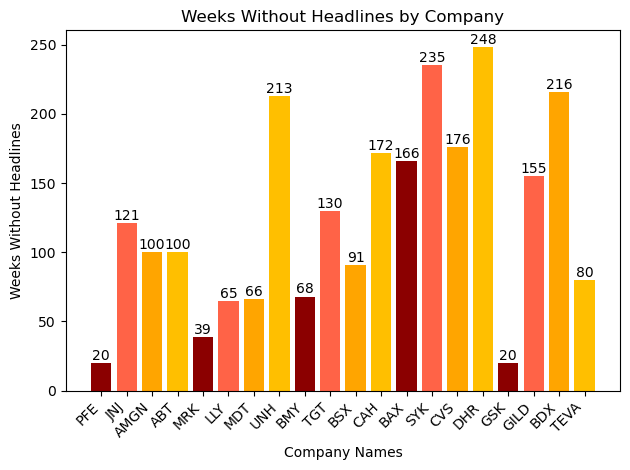

In [115]:
print("\n")
fig, ax = plt.subplots()

colors = ['#8b0000', 'tomato', 'orange', '#ffbf00']
['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']
# Create the bar plot
bars = ax.bar(ticks, nulls, color=colors)

# Set labels and title
ax.set_xlabel('Company Names')
ax.set_ylabel('Weeks Without Headlines')
ax.set_title('Weeks Without Headlines by Company')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

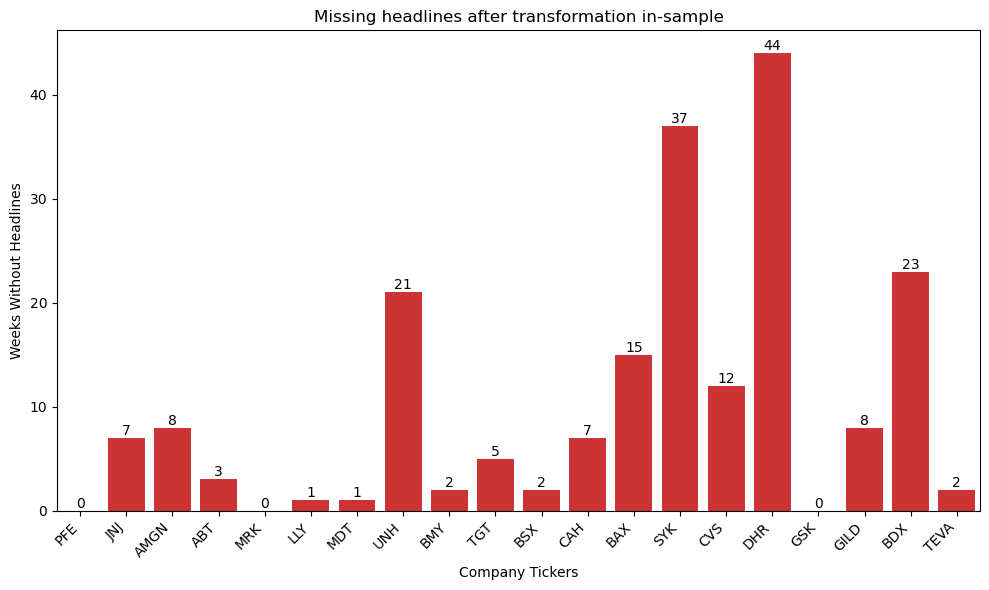

In [40]:
import seaborn as sns


data = {'Company': ticks, 'Weeks_Without_Headlines': nulls}
comps = pd.DataFrame(data)

# Set Seaborn style
# sns.set(style="whitegrid")

# Get a custom color palette from Seaborn
custom_palette = sns.color_palette("Set1", n_colors=1)

# Create the bar plot using Seaborn

print('\n')
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Weeks_Without_Headlines', data=comps, palette=custom_palette)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', color='black', fontsize=10)
# Customize labels and title
plt.xlabel('Company Tickers')
plt.ylabel('Weeks Without Headlines')
plt.title('Missing headlines after transformation in-sample')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

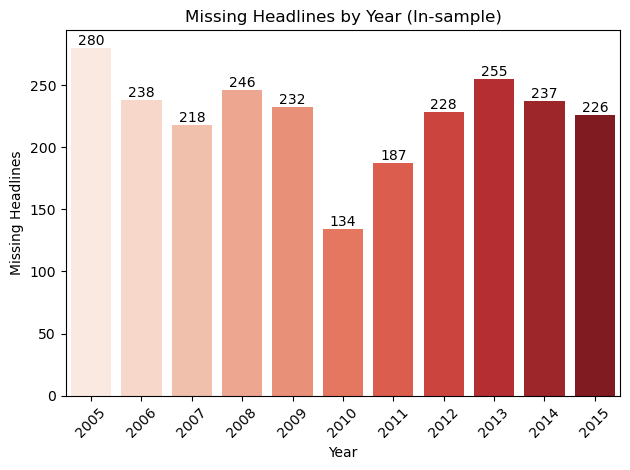

In [117]:
years = pd.concat(weekly_news.values())
years['year'] = years['FROM'].dt.year

# Group data by year and count null values in clean_headline
null_counts = years.groupby('year')['clean_headline'].apply(lambda x: x.isnull().sum())
null_counts = pd.DataFrame(null_counts)
# null_counts['year'] = null_counts.index.tolist()

sns.barplot(x=null_counts.index, y='clean_headline', data=null_counts, palette='Reds')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', color='black', fontsize=10)
print('\n')
# Customize labels and title
plt.xlabel('Year')
plt.ylabel('Missing Headlines')
plt.title('Missing Headlines by Year (In-sample)')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

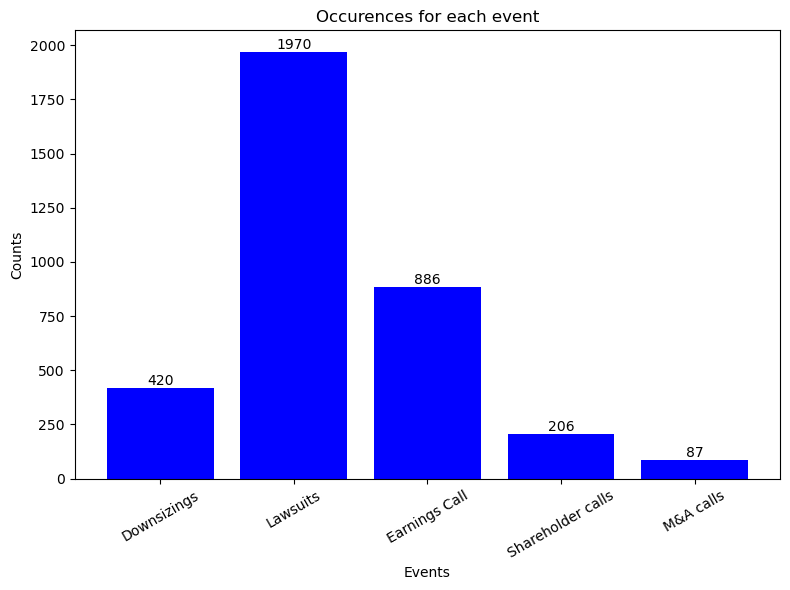

In [118]:
ticks = [48,21,52,50,152, 94,25]
mid = text_data[text_data.keydeveventtypeid.isin(ticks)]
mid.reset_index(drop=True, inplace=True)
# Group by keydeveventtypeid and count occurrences
tick_counts = mid.groupby('keydeveventtypeid')['clean_headline'].count()
value_counts = text_data['keydeveventtypeid'].value_counts()
selected_counts = value_counts.iloc[:15]

# Convert selected_counts to DataFrame
selected_counts_df = pd.DataFrame({'keydeveventtypeid': selected_counts.index, 'count': selected_counts.values})
# print(selected_counts_df)
# Convert tick_counts to DataFrame
tick_counts_df = pd.DataFrame({'keydeveventtypeid': tick_counts.index, 'count': tick_counts.values})
events = ['Downsizings','Lawsuits','Earnings Call', 'Shareholder calls','M&A calls', 'Special Dividends','Potential Buyback']
tick_counts_df['events'] = events
# print(tick_counts_df)
# Plot the counts for each tick
plt.figure(figsize=(8, 6))
plt.bar(tick_counts_df['events'][:5], tick_counts_df['count'][:5], color='blue')
plt.xlabel('Events')
plt.ylabel('Counts')
plt.title('Occurences for each event')
plt.xticks(tick_counts_df['events'][:5],rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()

In [131]:
len(text_data.keydeveventtypeid.unique())

87

In [94]:
text_data

,keydevid,companyid,companyname,keydeveventtypeid,headline,situation,clean_headline
announcedate,,,,,,,
2005-01-03,809686,275442,GLAXOSMITHKLINE PLC,23.0,Adolor Corp. and Glaxosmithkline to Co-Promote...,Adolor Corp. announced that the company has si...,corp copromot arixtrar u
2005-01-03,810155,275442,GLAXOSMITHKLINE PLC,41.0,Glaxosmithkline plc Announces FDA Approved App...,GlaxoSmithKline plc announced that the U.S. Fo...,plc announc fda approv applic expand use bexx...
2005-01-02,810324,103678,BECTON DICKINSON & CO,232.0,Becton Dickinson & Co. Declares Quarterly Divi...,The board of directors of Becton Dickinson & C...,co declar quarterli dividend payabl januari ...
2005-01-02,810324,103678,BECTON DICKINSON & CO,46.0,Becton Dickinson & Co. Declares Quarterly Divi...,The board of directors of Becton Dickinson & C...,co declar quarterli dividend payabl januari ...
2005-01-03,810589,25798,BRISTOL MYERS SQUIBB CO,16.0,Bristol-Myers Squibb Co. Names James M. Cornel...,Bristol-Myers Squibb Co. announced that its Bo...,co name jame corneliu board director
...,...,...,...,...,...,...,...
2015-12-31,321129180,139677,JOHNSON & JOHNSON,149.0,"Biotechnology Industry Organization, BioCentur...","Biotechnology Industry Organization, BioCentur...",biotechnolog industri organ biocenturi public ...
2015-12-31,321129180,162270,PFIZER INC,149.0,"Biotechnology Industry Organization, BioCentur...","Biotechnology Industry Organization, BioCentur...",biotechnolog industri organ biocenturi public ...
2015-12-31,321129180,285467,LILLY ELI & CO,149.0,"Biotechnology Industry Organization, BioCentur...","Biotechnology Industry Organization, BioCentur...",biotechnolog industri organ biocenturi public ...


In [103]:
text_data

,keydeveventtypeid,clean_headline,sentiment
0,48,Text 1,positive
1,48,Text 2,negative
2,21,Text 3,neutral
3,223,Text 4,positive
4,52,Text 5,neutral
5,21,Text 6,negative
6,53,Text 7,neutral
7,53,Text 8,positive
8,48,Text 9,neutral
9,5,Text 10,positive


In [122]:
df = pd.read_csv('/Users/dhruvishah/Desktop/Quant_Fin/SEM 2/Dissertation/final_data/insamp_headlines.csv')

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your data)

# Define events and tick values
events = ['Downsizings', 'Lawsuits', 'Earnings Call', 'Shareholder calls', 'M&A calls', 'Special Dividends', 'Potential Buyback']
ticks = [48, 21, 52, 50, 152, 94, 25]

# Filter data for selected ticks
df = pd.concat(subset_dict.values())
mid = df[df.keydeveventtypeid.isin(ticks)]
mid.reset_index(drop=True, inplace=True)

mid.loc[mid.returns>0,'direction'] = 'positive'
mid.loc[mid.returns<0,'direction'] = 'negative'
mid.loc[mid.returns==0,'direction'] = 'neutral'


print(mid)

# for i in range(len(ticks)):
#     df.loc[df.keydeveventtypeid==mktcap["Ticker Name"][i], 'mkt_cap'] = mktcap['Market Capitalization'][i]

grouped_counts = mid.groupby(['keydeveventtypeid', 'sentiment']).size().reset_index(name='count')
grouped_counts
# Filter for the top 5 events by count
top_events = grouped_counts.groupby('events').sum().nlargest(5, 'count').index
top_grouped_counts = grouped_counts[grouped_counts['events'].isin(top_events)]

# Plot the counts for each event and sentiment
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green']  # Different colors for positive, neutral, and negative sentiments

for i, event in enumerate(top_events):
    event_data = top_grouped_counts[top_grouped_counts['events'] == event]
    plt.bar(event_data['events'] + ' (' + event_data['sentiment'] + ')', event_data['count'], color=colors[i % 3])

plt.xlabel('Events (Sentiment)')
plt.ylabel('Counts')
plt.title('Occurences for Each Event by Sentiment')
plt.xticks(rotation=30, ha='right')

# Add legend for sentiment colors
plt.legend(['Positive', 'Neutral', 'Negative'])

plt.tight_layout()
plt.show()


AttributeError: 'DataFrame' object has no attribute 'returns'

In [92]:
pd.DataFrame(text_data.keydeveventtypeid.value_counts())

,keydeveventtypeid
41.0,4632
51.0,3999
149.0,3429
25.0,1970
23.0,1447
...,...
172.0,1
61.0,1
36.0,1
205.0,1


In [126]:
ticks = [48,]
# text_data.loc[text_data['keydeveventtypeid'].isin(ticks)]
pd.concat(subset_dict.values())

,keydevid,companyid,companyname,keydeveventtypeid,headline,situation,clean_headline
announcedate,,,,,,,
2005-01-04,810984,162270,PFIZER INC,25.0,Scott & Scott Files Lawsuit Against Pfizer Inc,A federal class action lawsuit has been filed ...,scott scott file lawsuit inc
2005-01-03,812136,162270,PFIZER INC,41.0,Pfizer Inc. Receives Approval from the U.S. Fo...,Pfizer Inc. announced that it has received app...,inc receiv approv u food drug administr marke...
2005-01-05,813037,162270,PFIZER INC,22.0,Sangamo Biosciences Inc. Forms Partnership wit...,Sangamo Biosciences Inc. announced a research ...,sangamo bioscienc inc form partnership inc
2005-01-05,815110,162270,PFIZER INC,23.0,Andrx Corp. Notifies Pfizer Inc. to Terminate ...,Andrx Corp. notified Pfizer Inc. that it is ex...,andrx corp notifi inc termin novemb suppli di...
2005-01-06,815190,162270,PFIZER INC,23.0,"Cytos, Pfizer Sign License Agreement on Animal...",Cytos Biotechnology AG has signed a research a...,cyto sign licens agreement anim drug
...,...,...,...,...,...,...,...
2015-12-14,319423732,308047,TEVA PHARMACEUTICAL INDS LTD,23.0,Teva Pharmaceutical Industries Ltd. Enters int...,Teva Pharmaceutical Industries Ltd. entered in...,pharmaceut industri ltd enter deal egalet cor...
2015-12-18,319852815,308047,TEVA PHARMACEUTICAL INDS LTD,48.0,"Teva Pharmaceutical Industries Limited, Q4 201...","Teva Pharmaceutical Industries Limited, Q4 201...",pharmaceut industri limit earn call feb
2015-12-18,319852821,308047,TEVA PHARMACEUTICAL INDS LTD,55.0,Teva Pharmaceutical Industries Limited to Repo...,Teva Pharmaceutical Industries Limited announc...,pharmaceut industri limit report result feb


In [52]:
years = pd.concat(subset_dict.values())
# years['year'] = years['FROM'].dt.year

# Group data by year and count null values in clean_headline
null_counts = years.groupby('keydeveventtypeid')['clean_headline'].apply(lambda x: x.sum())
null_counts = pd.DataFrame(null_counts)
# null_counts['year'] = null_counts.index.tolist()

sns.barplot(x=null_counts.index, y='clean_headline', data=null_counts, palette='Reds')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', color='black', fontsize=10)
print('\n')
# Customize labels and title
plt.xlabel('Year')
plt.ylabel('Missing Headlines')
plt.title('Missing Headlines by Year (In-sample)')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_30694/3169799799.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


KeyboardInterrupt: 

In [161]:
(sum(nulls)/(574*20))*100

1.724738675958188

In [162]:
for i in names.TICKER:
    temp = weekly_news[i]
    temp.clean_headline = temp.clean_headline.fillna('')

In [20]:
idf_dict = {}

In [22]:
def get_idf(temp, ticks):
    idf_counts = {}
    length = len(temp['clean_headline'])
    all_text = ' '.join(temp['clean_headline'])
    all_words = (np.unique(all_text.split())).tolist()
#     print(all_words)
    idf_df = pd.DataFrame()
    idf_df['words'] = all_words
#     print(idf_df['words'])
    for word in idf_df['words']:
#         print(word)
        for i in range(len(temp['clean_headline'])):
            if word in temp['clean_headline'][i]:
#                 print(i, "\n")
                if word not in idf_counts.keys():
                    idf_counts[word] = 1
#                     print("not", idf_counts.keys())
                else:
                    idf_counts[word] += 1
#                     print("in", idf_counts.keys())
#     print(list(idf_counts.values()))
    idf_df['doc_freq'] = list(idf_counts.values())
#     idf_df['doc_freq'] = idf_df['idf'] + 1
#     print(idf_df)
    idf_df['idf'] = np.log(length/idf_df['doc_freq'].loc[:])
    idf_df.set_index('words', inplace=True)

    subset_name = f'{ticks}'  # Unique name for each subset DataFrame
    idf_dict[subset_name] = idf_df

for i in range(len(names)):
    temp = weekly_news[names.TICKER[i]]
    get_idf(temp, names.TICKER[i])

In [23]:
lm_pos_words = pd.Series(loughran_mcdonald_dict[loughran_mcdonald_dict['Positive'] != 0]['Word'].tolist())
lm_neg_words = pd.Series(loughran_mcdonald_dict[loughran_mcdonald_dict['Negative'] != 0]['Word'].tolist())

def preprocess_LM(text):
# convert text to lower
    text = str(text).lower()

# remove numbers
    text = re.sub(r'\b\w*\d\w*\b', '', text)

# remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)

# remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

# remove urls
    text = re.sub(r"http\S+", "", text)

# remove brackets
    text = re.sub('\[.*?\]', '', text)

# remove special characters
    text = re.sub(r"[^\w\s]", "", text)

    text_tokens = word_tokenize(text)
    filtered_words = [w for w in text_tokens if w.lower() not in stop_words]
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in filtered_words]
    lem = WordNetLemmatizer()
    lemmed_words = [lem.lemmatize(word) for word in stemmed_words]


    cleaned_text = " ".join(lemmed_words)
    return cleaned_text
lm_pos_words = set(lm_pos_words.apply(preprocess_text))
lm_neg_words = set(lm_neg_words.apply(preprocess_text))

In [24]:
def assign_word_polarity(word):
    if word in lm_pos_words:
        return 1
    elif word in lm_neg_words:
        return -1
    else:
        return 0

def get_tf_idf(temp, ticker):
    for i in range(len(temp)):
        word_counts = {}
        news =  temp['clean_headline'][i]
        all_words = news.split()
#         print(all_words)
        vals = pd.Series(all_words).value_counts()
        vals = pd.DataFrame(vals)
        vals.rename(columns={0:'counts'}, inplace=True)
        vals['tf'] = (1+np.log(vals.counts))/(1+np.log(vals.counts.sum()))
#         print((1+np.log(vals.counts))/(1+np.log(vals.counts.sum())))
        idf_df = idf_dict[ticker]
#         print(idf_df)
        tf_idf_val = 0
        for word in all_words:
#             print(word)
            idf_val = idf_df.loc[word, 'idf']
            tf_val = vals.loc[word, 'tf']
            tf_idf_val += idf_val * tf_val * assign_word_polarity(word)
#             print(assign_word_polarity(word))
        temp.loc[i, 'tf-idf'] = tf_idf_val
    return temp

for i in range(len(names)):
    temp = weekly_news[names.TICKER[i]]
    get_tf_idf(temp, names.TICKER[i])

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_7096/1082656537.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vals = pd.Series(all_words).value_counts()
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_7096/1082656537.py:18: RuntimeWarning: divide by zero encountered in log
  vals['tf'] = (1+np.log(vals.counts))/(1+np.log(vals.counts.sum()))
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_7096/1082656537.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vals = pd.Series(all_words).value_counts()
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_7096/1082656537.py:18: RuntimeWarning: divide by zero encountered in log
  vals['tf'] = (1+np.log(vals.counts))/(1+np.log(vals.counts.sum()))
/var/folders/jq/fqfft7

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_7096/1082656537.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vals = pd.Series(all_words).value_counts()
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_7096/1082656537.py:18: RuntimeWarning: divide by zero encountered in log
  vals['tf'] = (1+np.log(vals.counts))/(1+np.log(vals.counts.sum()))
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_7096/1082656537.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vals = pd.Series(all_words).value_counts()
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_7096/1082656537.py:18: RuntimeWarning: divide by zero encountered in log
  vals['tf'] = (1+np.log(vals.counts))/(1+np.log(vals.counts.sum()))
/var/folders/jq/fqfft7

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_7096/1082656537.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vals = pd.Series(all_words).value_counts()
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_7096/1082656537.py:18: RuntimeWarning: divide by zero encountered in log
  vals['tf'] = (1+np.log(vals.counts))/(1+np.log(vals.counts.sum()))
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_7096/1082656537.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vals = pd.Series(all_words).value_counts()
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_7096/1082656537.py:18: RuntimeWarning: divide by zero encountered in log
  vals['tf'] = (1+np.log(vals.counts))/(1+np.log(vals.counts.sum()))
/var/folders/jq/fqfft7

In [25]:
def get_sentiment(temp,ticks):
    temp['sentiment'] = ''
    temp['sent_score'] = np.nan
    for i in range(len(temp)):
        if temp['tf-idf'][i] > 0:
            temp['sentiment'][i] = 'positive'
            temp['sent_score'][i] = 1
        elif temp['tf-idf'][i] == 0:
            temp['sentiment'][i] = 'neutral'
            temp['sent_score'][i] = 0
        else:
            temp['sentiment'][i] = 'negative'
            temp['sent_score'][i] = 2

for i in range(len(names)):
    temp = weekly_news[names.TICKER[i]]
    get_sentiment(temp, names.TICKER[i])

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_7096/2745920793.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['sentiment'][i] = 'negative'
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_7096/2745920793.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['sent_score'][i] = 2
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_7096/2745920793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [27]:
for i in names.TICKER:
    temp = weekly_news[i]
    temp['compname'] = i
weekly_news['PFE']

,week,FROM,TO,headline,clean_headline,returns,tf-idf,sentiment,sent_score,compname
0,1,2005-01-03,2005-01-21,scott scott file lawsuit.receiv approv u food ...,scott scott file lawsuit receiv approv u food ...,-8.874180,-3.316715,negative,2.0,PFE
1,2,2005-01-10,2005-01-28,report financi result fourth quarter full year...,report financi result fourth quarter full year...,-7.318101,-1.651882,negative,2.0,PFE
2,3,2005-01-17,2005-02-04,report financi result fourth quarter full year...,report financi result fourth quarter full year...,-3.959000,-1.934305,negative,2.0,PFE
3,4,2005-01-24,2005-02-11,lose appeal court rule declaratori judgment no...,lose appeal court rule declaratori judgment no...,3.648792,-0.483883,negative,2.0,PFE
4,5,2005-01-31,2005-02-18,submit snda expand potenti market lasofoxifen....,submit snda expand potenti market lasofoxifen ...,11.291867,0.474078,positive,1.0,PFE
...,...,...,...,...,...,...,...,...,...,...
567,568,2015-11-16,2015-12-04,moeli reportedli clinch advisori role merger t...,moeli reportedli clinch advisori role merger t...,-1.182453,4.032012,positive,1.0,PFE
568,569,2015-11-23,2015-12-11,allergan plc call.nysepf enter definit merger ...,allergan plc call nysepf enter definit merger ...,-0.192814,0.921811,positive,1.0,PFE
569,570,2015-11-30,2015-12-18,heptar therapeut sign strateg drug discoveri c...,heptar therapeut sign strateg drug discoveri c...,-2.342331,0.313492,positive,1.0,PFE
570,571,2015-12-07,2015-12-25,reckitt benckis may acquir pfizer unit.bioatla...,reckitt benckis may acquir pfizer unit bioatla...,-0.514373,0.378223,positive,1.0,PFE


In [29]:
for i in names.TICKER:
    temp = weekly_news[i]
    temp['compname'] = i

final_news_df = pd.concat(weekly_news.values())

final_news_df.sort_values(by =['week'], inplace=True)

final_news_df.reset_index(drop=True, inplace=True)
final_news_df.to_csv('insamp_headlines.csv')

In [200]:
word_count = pd.DataFrame()
word_count['companyname'] = np.nan
word_count['words'] = np.nan
word_count['counts'] = np.nan
word = []
counts = []
for i in range(len(names)):
    temp = subset_dict[names.TICKER[i]]
    # print(temp)
    all_text = ' '.join(temp['clean_headline'])
    all_words = all_text.split()
    vals = pd.Series(all_words).value_counts()
    # print(all_words)
    word_count.loc[i, 'companyname'] = names.TICKER[i]
    word.append(vals.nlargest(5).index.tolist())
    counts.append(vals.nlargest(5).tolist())
word_count.words = word
word_count.counts = counts
word_count

,companyname,words,counts
0,PFE,"[inc, present, confer, announc, annual]","[2345, 533, 500, 463, 304]"
1,JNJ,"[confer, present, earn, annual, oct]","[295, 292, 207, 175, 134]"
2,AMGN,"[inc, announc, confer, present, result]","[1101, 319, 291, 270, 256]"
3,ABT,"[laboratori, earn, announc, confer, result]","[1043, 290, 258, 206, 203]"
4,MRK,"[inc, co, announc, confer, present]","[1734, 1694, 410, 404, 398]"
5,LLY,"[eli, co, compani, announc, confer]","[1610, 1038, 472, 395, 338]"
6,MDT,"[medtron, inc, announc, confer, present]","[1704, 1327, 439, 276, 229]"
7,UNH,"[group, inc, earn, incorpor, announc]","[746, 497, 276, 213, 174]"
8,BMY,"[compani, co, announc, confer, present]","[891, 476, 399, 303, 275]"
9,TGT,"[corp, result, report, earn, sale]","[1060, 342, 308, 270, 247]"


In [202]:
years['clean_headline'] = years['clean_headline'].fillna('')

In [205]:
word_count = pd.DataFrame()
word_count['companyname'] = np.nan
word_count['words'] = np.nan
word_count['counts'] = np.nan
word = []
counts = []

all_text = ' '.join(years['clean_headline'])
all_words = all_text.split()
vals = pd.Series(all_words).value_counts()
word.append(vals.nlargest(5).index.tolist())
counts.append(vals.nlargest(5).tolist())

print(word)

[['announc', 'earn', 'confer', 'present', 'result']]


In [206]:
counts

[[16746, 14846, 14173, 12190, 11674]]

In [214]:
def get_wordCloud(comp):
    all_words = ' '.join([text for text in comp['clean_headline']])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color = "white").generate(all_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

WORD CLOUD FOR ALL THE DATA


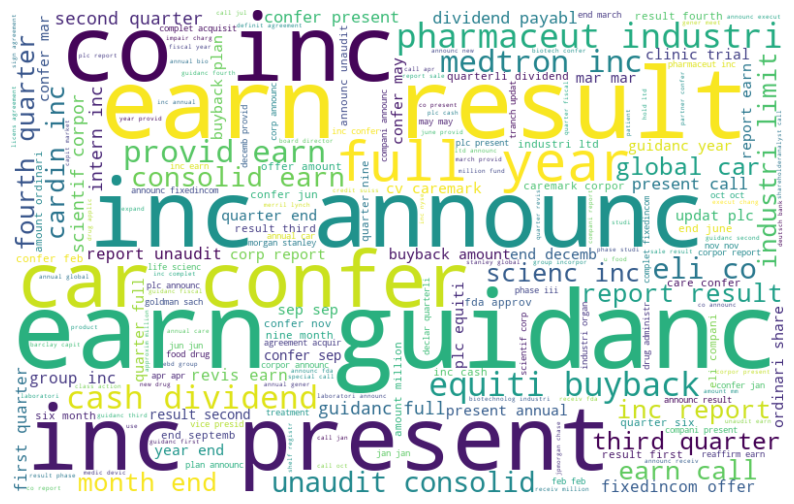

In [216]:
print("WORD CLOUD FOR ALL THE DATA")
get_wordCloud(text_data)